### Project Overview

The proliferation of online platforms has led to an overwhelming volume of unsolicited messages, including promotional and fraudulent content, inundating consumer inboxes. This deluge of spam obscures essential communications, diminishing user experience.

### Project Objective

This project aims to develop a robust SMS spam detection model capable of accurately classifying messages as legitimate or spam. By leveraging Natural Language Processing (NLP) techniques and the Naive Bayes algorithm, we will analyze a dataset of 5,574 SMS messages labeled as either "ham" (legitimate) or "spam." This research will contribute to the development of effective spam filtering solutions, enhancing user experience and mitigating the negative impacts of unsolicited messages.).

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Inspection and Cleaning

In [3]:
df.shape

(5572, 5)

The dataste contains 5,572 rows and 5 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Check the data type
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [7]:
# drop redundant columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
df.sample(5)

,v1,v2
4066,spam,You are being contacted by our Dating Service ...
3047,ham,Die... Now i have e toot fringe again...
2194,ham,Hi my email address has changed now it is
1534,ham,Remember on that day..
1788,ham,Arun can u transfr me d amt


In [8]:
# Check for duplicate
df.duplicated().sum()

403

There are 403 duplicated values and we have to remove them

In [9]:
# Check the number unique values in each features
df.nunique()

v1       2
v2    5169
dtype: int64

In [10]:
# Check for missing values
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [11]:
df= df.drop_duplicates()

In [12]:
# Verify
df.duplicated().sum()

0

In [14]:
df.sample(5)

,v1,v2
3765,ham,Yes.mum lookin strong:)
1773,ham,"I'm not coming over, do whatever you want"
1034,ham,ZOE IT JUST HIT ME 2 IM FUCKING SHITIN MYSELF ...
2122,ham,Do you know when the result.
3602,ham,"I'm not sure, I was just checking out what was..."


In [15]:
# Rename columns

df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)

In [16]:
df.sample(5)

,message_type,message
1615,ham,Mm i had my food da from out
4402,ham,Just getting back home
1745,ham,IåÕm cool ta luv but v.tired 2 cause i have be...
70,ham,Wah lucky man... Then can save money... Hee...
861,ham,Your brother is a genius


As this is a classification problem we want the “message_type” to be binary classified i.e, 0 or 1 so for this purpose we use label encoder.

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
df['message_type']=encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)

57      0
4359    0
1732    0
4553    0
4975    0
Name: message_type, dtype: int32

In [18]:
df[df['message_type']==1]

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [19]:
df[df['message_type']==0]

,message_type,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
6,0,Even my brother is not like to speak with me. ...
...,...,...
5565,0,Huh y lei...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## Exploratory Data Analysis

Let’s visualise the classification problem to get a better understanding of the data.

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df['message_type'].value_counts()

message_type
0    4516
1     653
Name: count, dtype: int64

4516 messages are ham while 653 are spam

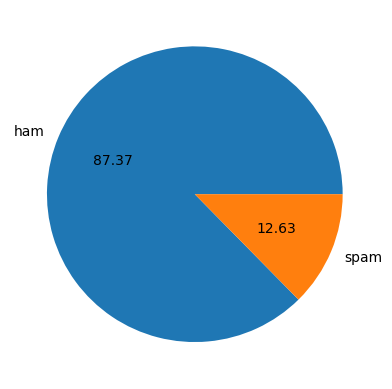

In [15]:
plt.pie(df['message_type'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

This is an imbalanced data,a s can be seen

Now let’s find out :
- No. of characters in the data
- No. of words in the data
- No. of sentences in the data and form 3 new columns in the data depicting the no. of characters, words, and sentences.

#### For a number of characters:

In [22]:
#natural language tool kit
import nltk

In [23]:
df['num_characters']=df['message'].apply(len)
df.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


#### For a number of words :

In [24]:
from nltk.tokenize import word_tokenize
df['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [25]:
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words
4062,0,How are you. Its been ages. How's abj,37,11
2229,0,haha but no money leh... Later got to go for t...,108,22
320,0,"Merry Christmas to you too babe, i love ya *ki...",51,13
2809,0,Mm so you asked me not to call radio,36,9
3664,0,Ha... U jus ate honey ar? So sweet...,37,11


#### For a number of sentences :

In [26]:
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [27]:
df.sample(5)

,message_type,message,num_characters,num_words,num_sentences
5564,0,Why don't you wait 'til at least wednesday to ...,67,16,1
360,0,Ha ha cool cool chikku chikku:-):-DB-),38,12,1
4933,0,Hey do you want anything to buy:),33,9,1
5135,0,Sorry * was at the grocers.,27,7,1
1564,0,Tmrw. Im finishing 9 doors,26,6,2


#### For ‘Ham’ messages:

In [28]:
# Statistical characteristics of Ham messages
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


#### For ‘Spam’ messages:

In [29]:
# Statistical characteristics of Spam messages
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


 We can clearly see the spam messages are quite longer than the ham messages.

In [24]:
#pip install --upgrade seaborn

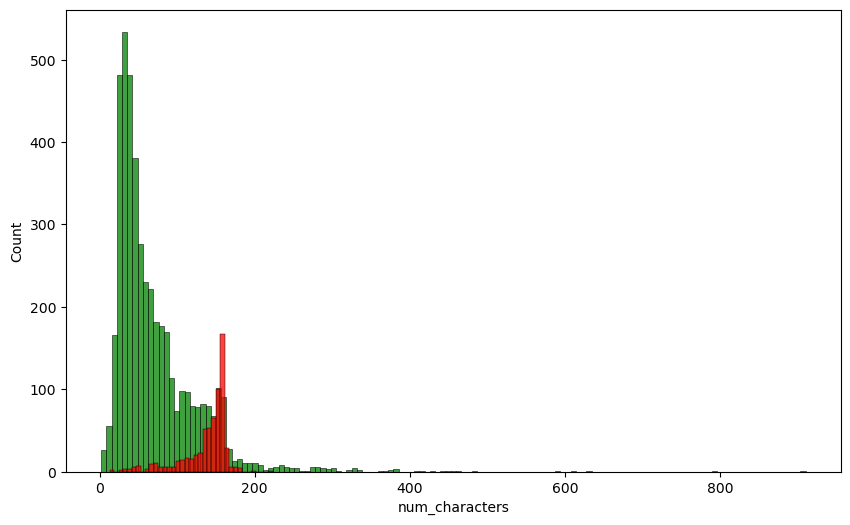

In [33]:
# Visualizing for characters
plt.figure(figsize=(10,6))
sns.histplot(df[df['message_type']==0]['num_characters'],color='green')
sns.histplot(df[df['message_type']==1]['num_characters'],color = 'red')

plt.show()

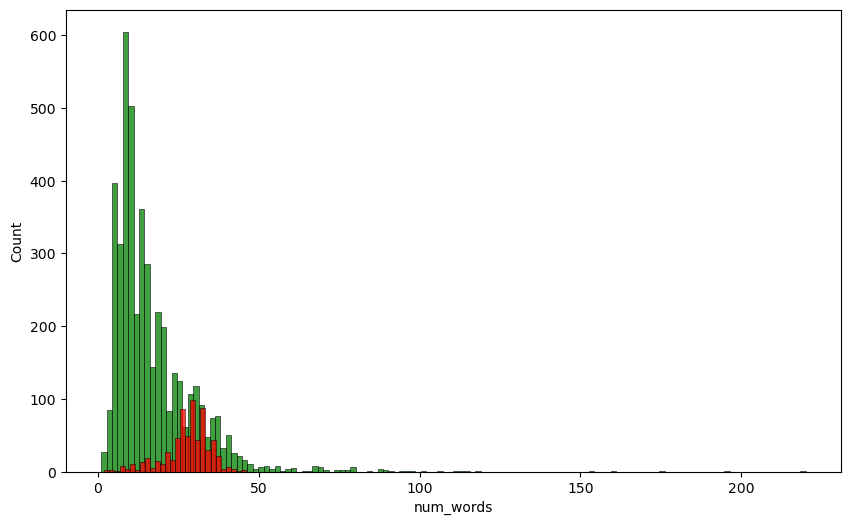

In [34]:
# Visualizing for words
plt.figure(figsize=(10,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='green')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')

plt.show()

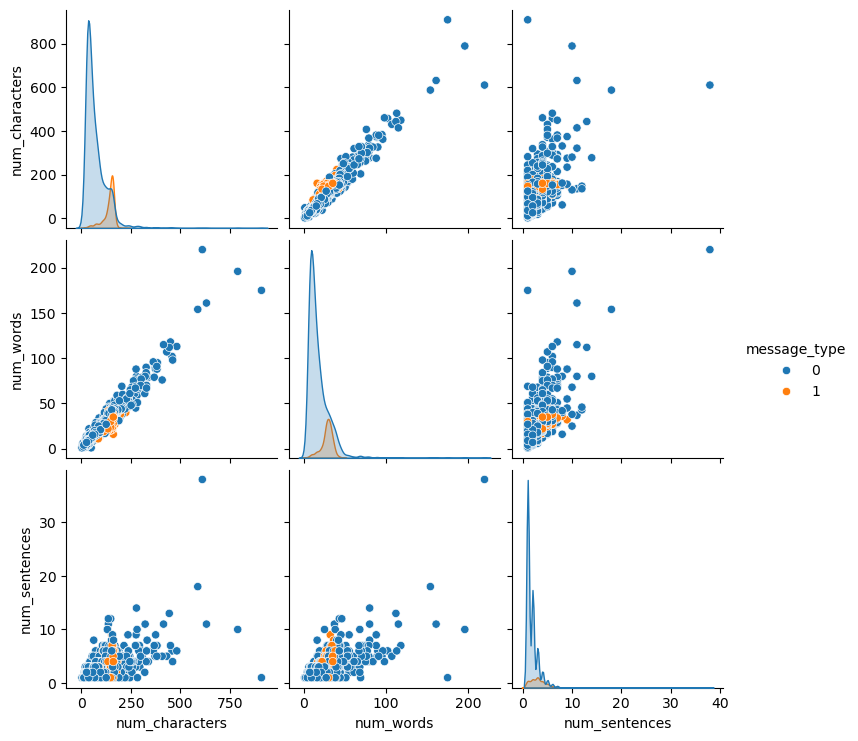

In [39]:
#plot pairplots for ham and spam
sns.pairplot(df,hue='message_type')
plt.show()

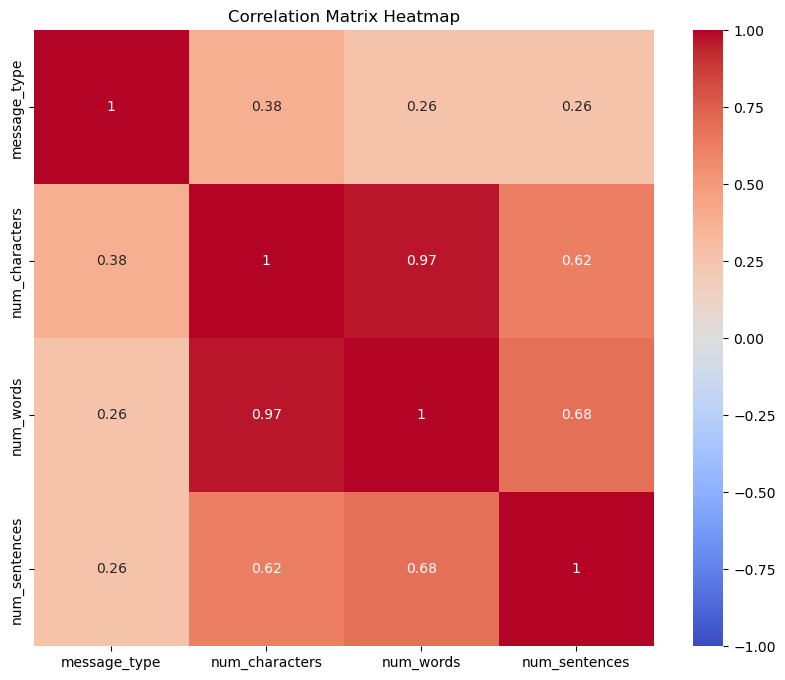

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


From the heatmap, we can notice multicollinearity, hence, we cannot use all three columns instead we shall use only one and that has highest correlation with message_type. i.e num_characters

### Data Preprocessing
- LowerCase
- Tokenisation
- Removing special characters
- Removing stop words and punctuation
- Stemming — Lemmatization

In [48]:
def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)
    y=[] 
    for i in message:
        if i.isalnum():
            y.append(i)

        y.clear()
    
    #for checking punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()
    
    #now stemming function
    for i in message:
        y.append(ps.stem(i))
    
    #return y  --> returns as list
    return " ".join(y)

In [50]:
# Removing stop words and punctuations
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english'))

179

In [52]:
#now for punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
# stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

Now let’s apply the text_transform function to all the messages in the dataset.

In [55]:
# see here the special character $ is ignored , no stopwords and no punctuation
text_transform("THis is a SMS spam CLassifier playing,wasn't $3000") 

"sm spam classifi play n't 3000"

In [56]:
df.head(2)

,message_type,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [57]:
# Apply text_transform to all messages in the dataset
df['transformed_msg']=df['message'].apply(text_transform)

To get a clear idea about the most frequent words used we make a  word cloud.

In [58]:
df.head(2)

,message_type,message,num_characters,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...


In [65]:
from wordcloud import WordCloud
wc=WordCloud(width=800,height=400,min_font_size=10,background_color='white')

### For Spam

In [66]:
spam_wc=wc.generate(df[df['message_type']==1]['transformed_msg'].str.cat(sep=""))

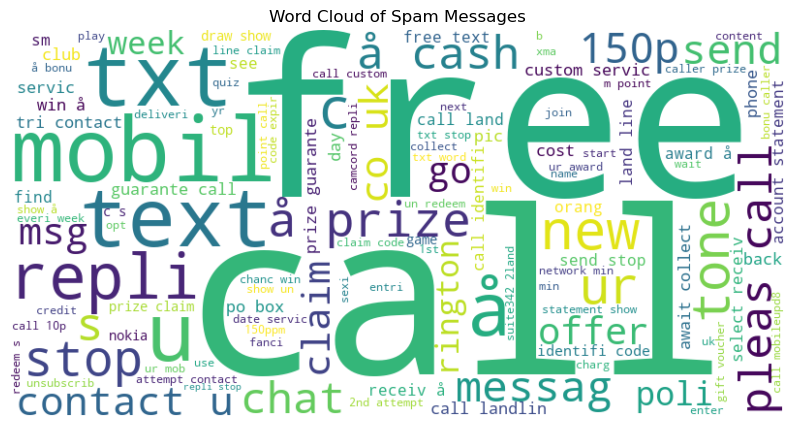

In [67]:
# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Spam Messages')
plt.show()

### For Ham:

In [68]:
ham_wc=wc.generate(df[df['message_type']==0]['transformed_msg'].str.cat(sep=""))

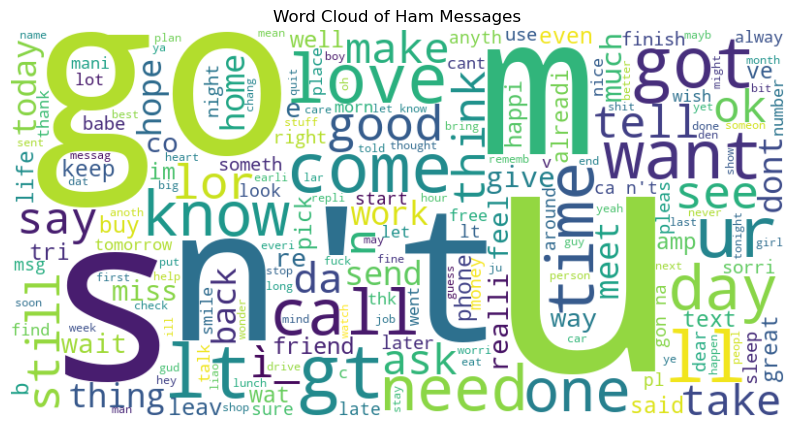

In [69]:
# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Ham Messages')
plt.show()

To simplify what is drawn inside the WordClouds we will find out the top 30 words used in both ham as well as spam messages.

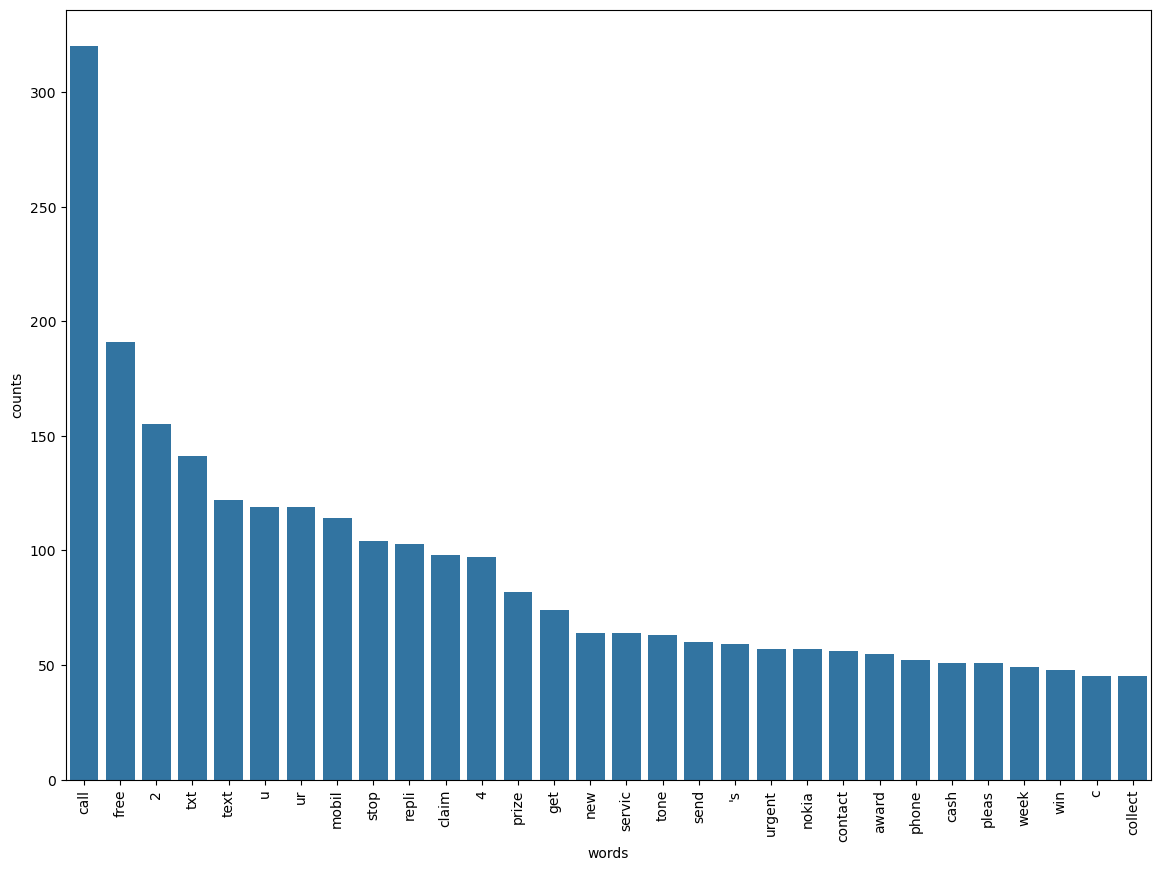

In [70]:
spam_corpus = []
for msg in df[df['message_type']==1]['transformed_msg'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

from collections import Counter
word_counts = Counter(spam_corpus).most_common(30)
words, counts = zip(*word_counts)  # Unpack word-count pairs

# Create DataFrame
data_frame = pd.DataFrame({'words': words, 'counts': counts})

plt.figure(figsize=(14, 10))
sns.barplot(x='words', y='counts', data=data_frame)  # Use data_frame directly
plt.xticks(rotation='vertical')
plt.show()


In [71]:
 len(spam_corpus)

11083

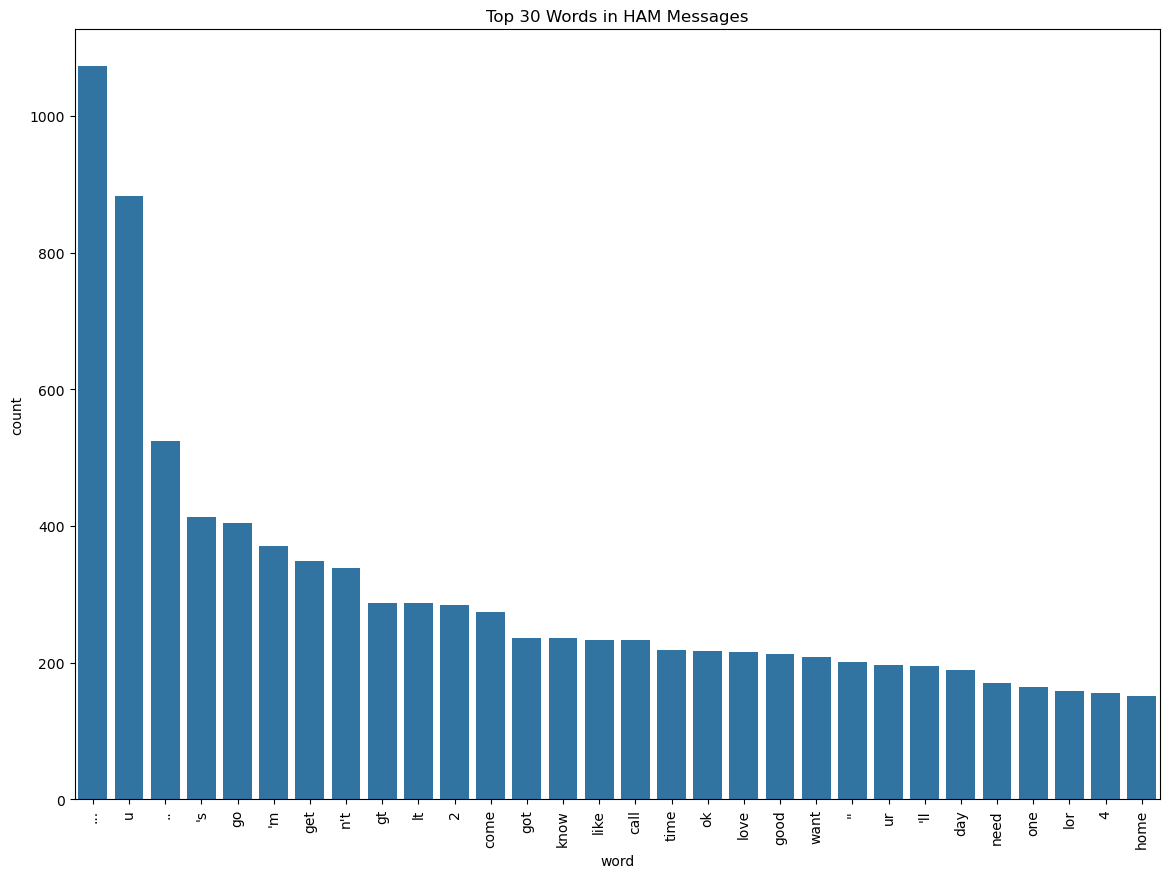

In [73]:
import matplotlib.pyplot as plt
# Find top 30 words for HAM
ham_corpus = []
for msg in df[df['message_type'] == 0]['transformed_msg']:
    for word in msg.split():
        ham_corpus.append(word)

# Get the 30 most common words
most_common_ham_words = Counter(ham_corpus).most_common(30)

# Convert to DataFrame for plotting
most_common_ham_words_df = pd.DataFrame(most_common_ham_words, columns=['word', 'count'])

# Plotting the barplot
plt.figure(figsize=(14, 10))
sns.barplot(x='word', y='count', data=most_common_ham_words_df)
plt.xticks(rotation='vertical')
plt.title('Top 30 Words in HAM Messages')
plt.show()


### Model Building
- #### Naive Bayes

It is well known that on textual data, Naive Bayes Algorithm works best, hence, we will be using it to train our model and also compare it with different algorithms

#### Vectorization

In the Naive Bayes algorithm, the input columns should be numerical so we have to convert (VECTORIZE) the column.

- Bag of Words
- TFIDF

- #### Bag of Words

In [74]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [75]:
## toarray to convert from sparse array to dense array
X=cv.fit_transform(df['transformed_msg']).toarray()


In [76]:
y=df['message_type'].values

In [77]:
# Import train_test_split
from sklearn.model_selection import train_test_split


In [78]:
# Split the training and text data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=2)

In [79]:
from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import BernoulliNB

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, f1_score

In [80]:
gnb = GaussianNB()

bnb = BernoulliNB()

mnb = MultinomialNB()

We will find out the Accuracy score, confusion Matrix and Precision Score of all 3 types of Naive Bayes:

In [81]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)

print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))


Accuracy score of Gaussian NB is:  0.8907156673114119
Confusion Matrix of Guassian NB is:  [[796 100]
 [ 13 125]]
Precision score of the Gaussian NB is 0.5555555555555556


we want to reduce false postives as it is a high precision model

In [82]:
bnb.fit(X_train,y_train)
y_pred2=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred2))


Accuracy score of Bernoulli NB is:  0.97678916827853
Confusion Matrix of Bernoulli NB is:  [[893   3]
 [ 21 117]]
Precision score of the Bernoulli NB is 0.975


In [83]:
mnb.fit(X_train,y_train)
y_pred3=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred3))


Accuracy score of Multinomial NB is:  0.9738878143133463
Confusion Matrix of Multinomial NB is:  [[880  16]
 [ 11 127]]
Precision score of the Multinomial NB is 0.8881118881118881


This is an imbalanced data so precision score matters the most

- #### TF-IDF

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000)

In [85]:
X=tfidf.fit_transform(df['transformed_msg']).toarray()

In [86]:
X.shape

(5169, 3000)

In [89]:
y=df['message_type'].values

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [92]:
gnb = GaussianNB()

bnb = BernoulliNB()

mnb = MultinomialNB()

In [93]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)

print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))


Accuracy score of Gaussian NB is:  0.8781431334622823
Confusion Matrix of Guassian NB is:  [[790 106]
 [ 20 118]]
Precision score of the Gaussian NB is 0.5267857142857143


In [94]:
bnb.fit(X_train,y_train)
y_pred2=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred2))


Accuracy score of Bernoulli NB is:  0.988394584139265
Confusion Matrix of Bernoulli NB is:  [[896   0]
 [ 12 126]]
Precision score of the Bernoulli NB is 1.0


In [95]:
mnb.fit(X_train,y_train)
y_pred3=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred3))

Accuracy score of Multinomial NB is:  0.9748549323017408
Confusion Matrix of Multinomial NB is:  [[896   0]
 [ 26 112]]
Precision score of the Multinomial NB is 1.0


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred3)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

Here the precision comes out to be 1 which proves very good for our model as there will be no “FALSE POSITIVES”

We will finalise the Model with MNB(Multinomial Naive Bayes) and TFIDF Vectorization.

#### Lets compare other classification algorithms with MNB

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [97]:
#Creating objects of every algorithm
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [98]:
# create a dictionary of classifiers
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [99]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [100]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9777562862669246, 0.9752066115702479)

In [101]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  NB
Accuracy -  0.9748549323017408
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8631578947368421
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9523809523809523
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9729206963249516
Precision -  0.9583333333333334
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.8444444444444444
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9758064516129032
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.9387755102040817
For  xgb
Accuracy -  0.9758220502901354
Precision -  0.9669421487603306


In [102]:
perf_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [103]:
perf_df

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
2,NB,0.974855,1.000000
5,RF,0.975822,0.982906
8,ETC,0.980658,0.975806
0,SVC,0.977756,0.975207
10,xgb,0.975822,0.966942
6,AdaBoost,0.972921,0.958333
4,LR,0.958414,0.952381
9,GBDT,0.949710,0.938776
3,DT,0.933269,0.863158


In [104]:
perf_df1 = pd.melt(perf_df, id_vars = "Algorithm")

In [117]:
perf_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904255
1,NB,Accuracy,0.974855
2,RF,Accuracy,0.975822
3,ETC,Accuracy,0.980658
4,SVC,Accuracy,0.977756
5,xgb,Accuracy,0.975822
6,AdaBoost,Accuracy,0.972921
7,LR,Accuracy,0.958414
8,GBDT,Accuracy,0.949710
9,DT,Accuracy,0.933269


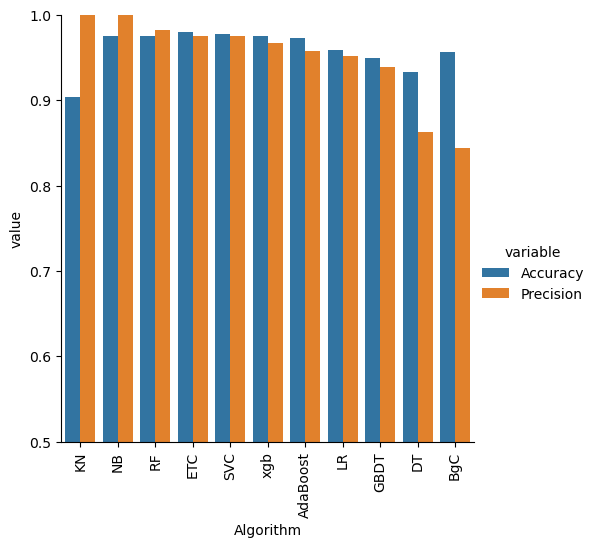

In [106]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=perf_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### Hyperparameter Tuning

- ##### Model Improvement
  - Change the max_feature parameter in TFIDF.

In [107]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [108]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [110]:
new_df = perf_df.merge(temp_df,on='Algorithm')

In [111]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [112]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [113]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.904255,1.000000,0.904255,1.000000,0.904255,1.000000,0.904255,1.000000
1,NB,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,ETC,0.980658,0.975806,0.980658,0.975806,0.980658,0.975806,0.980658,0.975806
4,SVC,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207
5,xgb,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942
6,AdaBoost,0.972921,0.958333,0.972921,0.958333,0.972921,0.958333,0.972921,0.958333
7,LR,0.958414,0.952381,0.958414,0.952381,0.958414,0.952381,0.958414,0.952381
8,GBDT,0.949710,0.938776,0.949710,0.938776,0.949710,0.938776,0.949710,0.938776
9,DT,0.933269,0.863158,0.933269,0.863158,0.933269,0.863158,0.933269,0.863158


After a lot of experiments and improvement, we have trained our model to get an Accuracy score of 97% and a precision Score of 100%.

In [114]:
# Saving our model and tfidf vectorizer
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

### Model Deployment

- Streamlit Deployement

In [ ]:
# We will create a app.py file in our IDE using the code:
import streamlit as st
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))
st.title("Email/SMS Spam Classifier")
input_sms = st.text_area("Enter the message")
if st.button('Predict'):
    # 1. preprocess
    transformed_sms = transform_text(input_sms)
    # 2. vectorize
    vector_input = tfidf.transform([transformed_sms])
    # 3. predict
    result = model.predict(vector_input)[0]
    # 4. Display
    if result == 1:
        st.header("Spam")
    else:
        st.header("Not Spam")

#### Deployment on Heroku

Deployment on Heroku is pretty straightforward;

Login to the Heroku website and create a new app.

Install the Heroku CLI and follow the given steps:

$ heroku login
$ cd my-project/
$ git init
$ heroku git:remote -a arcane-bayou-70408

Deploy your application
$ git add .
$ git commit -am "make it better"
$ git push heroku master

Your Website is up and running!!!